In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
import matplotlib.pyplot as plt
import nest
import numpy as np
import os
import re

from pynestml.codegeneration.nest_code_generator_utils import NESTCodeGeneratorUtils

from matplotlib import rcParams

text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=12)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels 
plt.rc('legend', fontsize=12)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 19 2024 15:53:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# import warnings
# warnings.filterwarnings("ignore", message="ANTLR runtime and generated code versions disagree:.*")

# module_name, neuron_model_name, synapse_model_name = NESTCodeGeneratorUtils.generate_code_for(
#     nestml_neuron_model= "hill_tononi_neuron.nestml",
#     nestml_synapse_model= "stdp_synapse.nestml",
#     module_name= "nestml_module",
#     post_ports = ["post_spikes"],
#     target_path = "target")

# Now we can use the new module

In [3]:
#os.environ['LD_LIBRARY_PATH'] = '/tmp/nestml_target:' + os.environ.get('LD_LIBRARY_PATH', '')
nest.ResetKernel()
nest.Install("target/nestml_module")
nest.set_verbosity("M_ERROR")


Nov 27 15:24:51 Install [Info]: 
    loaded module target/nestml_module


In [4]:
print(nest.node_models)
print(nest.synapse_models)

('volume_transmitter', 'weight_recorder', 'ac_generator', 'dc_generator', 'gamma_sup_generator', 'mip_generator', 'noise_generator', 'inhomogeneous_poisson_generator', 'poisson_generator', 'poisson_generator_ps', 'ppd_sup_generator', 'pulsepacket_generator', 'sinusoidal_poisson_generator', 'spike_generator', 'step_current_generator', 'step_rate_generator', 'sinusoidal_gamma_generator', 'aeif_cond_alpha', 'aeif_cond_alpha_astro', 'aeif_cond_alpha_multisynapse', 'aeif_cond_beta_multisynapse', 'aeif_cond_exp', 'aeif_psc_alpha', 'aeif_psc_exp', 'aeif_psc_delta', 'astrocyte_lr_1994', 'gif_cond_exp', 'gif_cond_exp_multisynapse', 'glif_cond', 'hh_cond_exp_traub', 'hh_cond_beta_gap_traub', 'hh_psc_alpha', 'hh_psc_alpha_gap', 'ht_neuron', 'iaf_chxk_2008', 'iaf_cond_alpha', 'iaf_cond_alpha_mc', 'iaf_cond_beta', 'iaf_cond_exp', 'iaf_cond_exp_sfa_rr', 'siegert_neuron', 'amat2_psc_exp', 'cm_default', 'eprop_iaf_bsshslm_2020', 'eprop_iaf_adapt_bsshslm_2020', 'eprop_readout_bsshslm_2020', 'gif_psc_ex

In [5]:
# Define neuron and synapse models
neuron_model = "ht_neuron"  # Integrate-and-fire neuron with alpha-shaped PSCs
synapse_model = "stdp_synapse"  # Spike-timing-dependent plasticity synapse

# Create two neurons: pre-synaptic and post-synaptic
pre_neuron = nest.Create(neuron_model, 1)
post_neuron = nest.Create(neuron_model, 1)

# Create a weight recorder to log changes in synaptic weights
wr = nest.Create("weight_recorder")
nest.SetDefaults(synapse_model, {"weight_recorder": wr[0]})  # Attach recorder to the STDP synapse

# Display default parameters for the neuron and synapse model
print(nest.GetDefaults(neuron_model))
print(nest.GetDefaults(synapse_model))

{'archiver_length': 0, 'available': (0,), 'beta_Ca': 0.001, 'Ca': 0.0, 'capacity': (2,), 'E_K': -90.0, 'E_Na': 30.0, 'E_rev_AMPA': 0.0, 'E_rev_GABA_A': -70.0, 'E_rev_GABA_B': -90.0, 'E_rev_h': -40.0, 'E_rev_KNa': -90.0, 'E_rev_NaP': 30.0, 'E_rev_NMDA': 0.0, 'E_rev_T': 0.0, 'element_type': 'neuron', 'elementsize': 1048, 'frozen': False, 'g_KL': 1.0, 'g_NaL': 0.2, 'g_peak_AMPA': 0.1, 'g_peak_GABA_A': 0.33, 'g_peak_GABA_B': 0.0132, 'g_peak_h': 1.0, 'g_peak_KNa': 1.0, 'g_peak_NaP': 1.0, 'g_peak_NMDA': 0.075, 'g_peak_T': 1.0, 'global_id': 0, 'instant_unblock_NMDA': False, 'instantiations': (2,), 'local': True, 'model': 'ht_neuron', 'model_id': 31, 'N_NaP': 3.0, 'N_T': 2.0, 'node_uses_wfr': False, 'post_trace': 0.0, 'receptor_types': {'AMPA': 1, 'GABA_A': 3, 'GABA_B': 4, 'NMDA': 2}, 'recordables': ('g_AMPA', 'g_GABA_A', 'g_GABA_B', 'g_NMDA', 'I_h', 'I_KNa', 'I_NaP', 'I_T', 'theta', 'V_m'), 'S_act_NMDA': 0.081, 'synaptic_elements': {}, 't_ref': 2.0, 't_spike': -1.0, 'tau_Ca': 10000.0, 'tau_D_

In [6]:
## Set defaults for the first synapse to target AMPA (receptor type 1)
nest.SetDefaults(synapse_model, {"receptor_type": 1})
nest.Connect(pre_neuron, post_neuron, "one_to_one", {"synapse_model": synapse_model})

# Set defaults for the second synapse to target NMDA (receptor type 2)
nest.SetDefaults(synapse_model, {"receptor_type": 2})
nest.Connect(pre_neuron, post_neuron, "one_to_one", {"synapse_model": synapse_model})

# Verify connections
print(nest.GetConnections(pre_neuron, post_neuron))

 source   target   synapse model   weight   delay 
-------- -------- --------------- -------- -------
      1        2    stdp_synapse    1.000   1.000
      1        2    stdp_synapse    1.000   1.000


In [8]:
# Define simulation parameters
duration = 10000  # Simulation time in milliseconds
frequency = 0.5  # Spike frequency in Hz
delta_t = 10  # Time shift in milliseconds (pre- vs. post-spike)
interval = 1000.0 / frequency  # Interval between spikes

# Generate spike times for the spike generator
spike_times = np.arange(interval, duration, interval)
spike_generator = nest.Create("spike_generator", {"spike_times": spike_times})

# Adjust pre- and post-synaptic delays based on delta_t
if delta_t >= 0:
    delta_pre = 0.0
    delta_post = delta_t
else:
    delta_pre = -1 * delta_t
    delta_post = 0.0

# Connect the spike generator to the pre-neuron via an AMPA synapse
nest.Connect(spike_generator, pre_neuron, "one_to_one", {
    "synapse_model": "static_synapse",
    "weight": 999.0,  # Strong input weight
    "delay": 1.0 + delta_pre,  # Adjusted delay
    "receptor_type": 1  # Target AMPA receptor for fast transmission
})

# Connect the spike generator to the post-neuron via an NMDA synapse
nest.Connect(spike_generator, post_neuron, "one_to_one", {
    "synapse_model": "static_synapse",
    "weight": 999.0,  # Strong input weight
    "delay": 1.0 + delta_post,  # Adjusted delay
    "receptor_type": 2  # Target NMDA receptor for plasticity effects
})

# Connect the spike generator to the pre-neuron via an NMDA synapse
nest.Connect(spike_generator, pre_neuron, "one_to_one", {
    "synapse_model": "static_synapse",
    "weight": 999.0,  # Strong input weight
    "delay": 1.0 + delta_pre,  # Adjusted delay
    "receptor_type": 2  # Target NMDA receptor for plasticity effects
})

# Connect the spike generator to the post-neuron via an AMPA synapse
nest.Connect(spike_generator, post_neuron, "one_to_one", {
    "synapse_model": "static_synapse",
    "weight": 999.0,  # Strong input weight
    "delay": 1.0 + delta_post,  # Adjusted delay
    "receptor_type": 1  # Target AMPA receptor for fast transmission
})

# Record spikes using a spike recorder
sd = nest.Create("spike_recorder")
nest.Connect(pre_neuron, sd)  # Connect pre-neuron to spike recorder
nest.Connect(post_neuron, sd)  # Connect post-neuron to spike recorder

# Record membrane potentials using voltmeters
vm_pre = nest.Create("voltmeter")
vm_post = nest.Create("voltmeter")
nest.Connect(vm_pre, pre_neuron)  # Connect voltmeter to pre-neuron
nest.Connect(vm_post, post_neuron)  # Connect voltmeter to post-neuron

# Record conductances in the postsynaptic neuron
multimeter = nest.Create("multimeter", params={"record_from": ["g_AMPA", "g_NMDA", "V_m"]})
nest.Connect(multimeter, post_neuron)

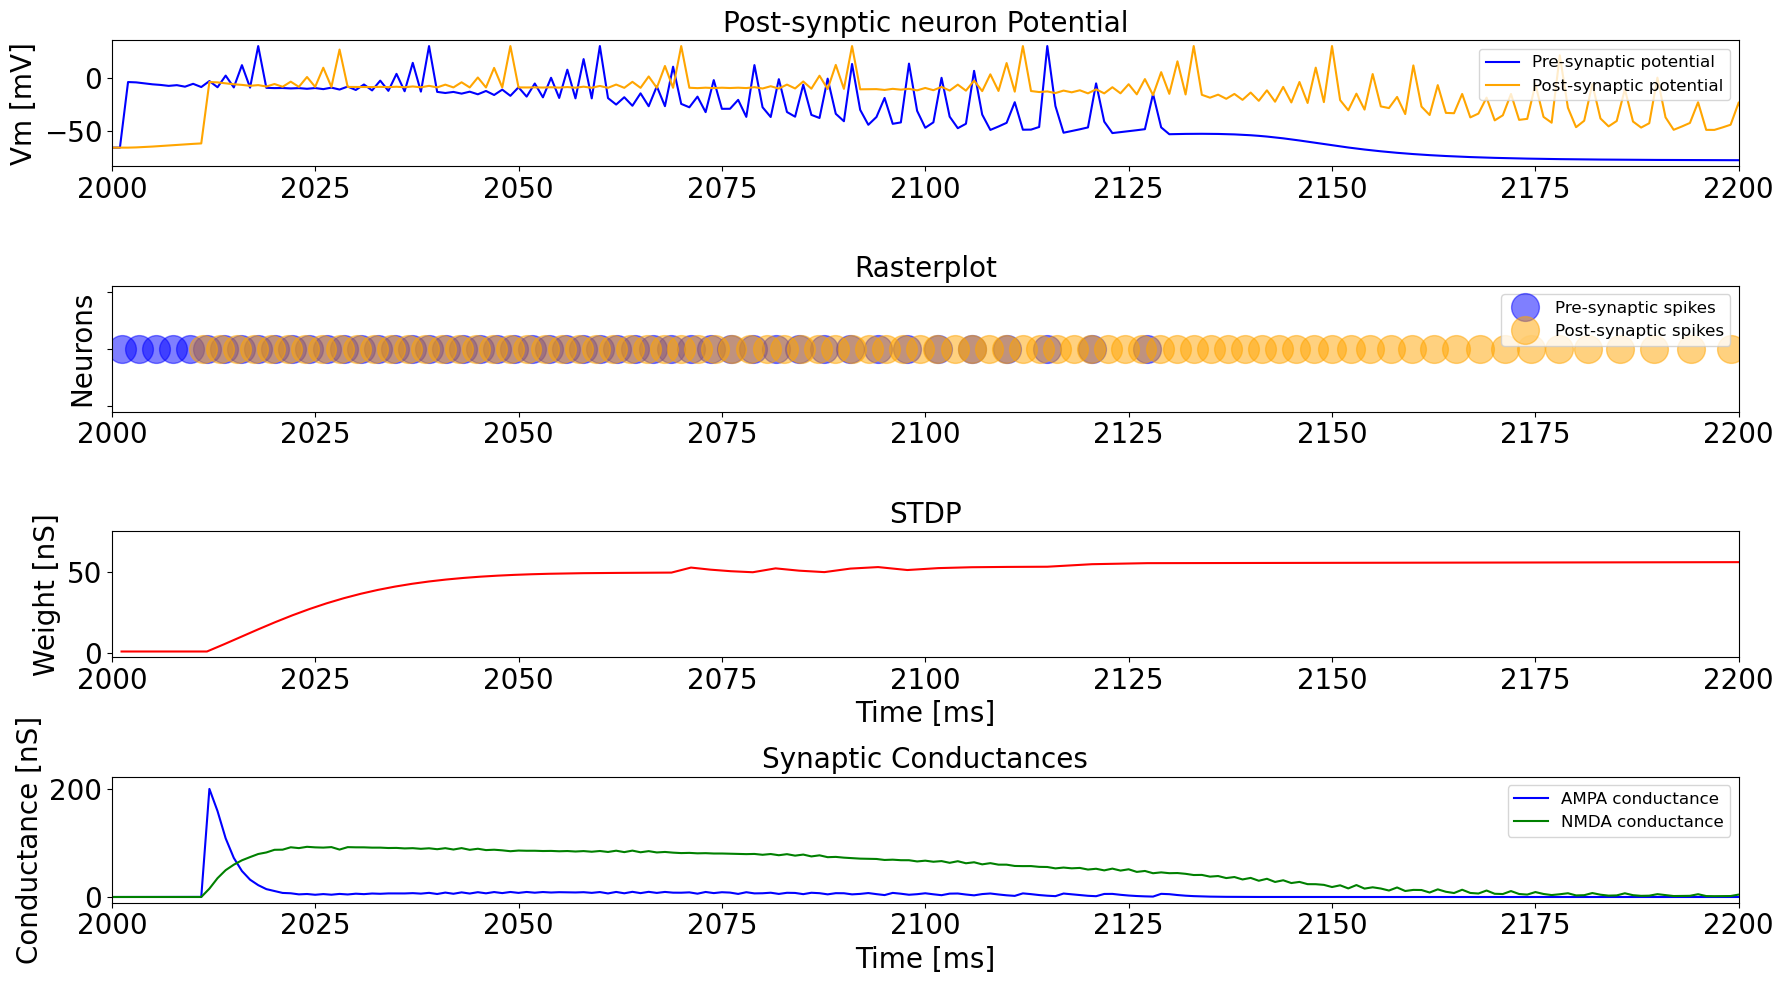

In [9]:
# Simulate
nest.Simulate(duration)
spikes = sd.get(['events'][0])

interval = [2000, 2200]

#print(sd.events)
fig, ax = plt.subplots(4, figsize = (18,10))

ax[0].plot(vm_pre.events["times"], vm_pre.events["V_m"], color = "b", label = "Pre-synaptic potential")
ax[0].plot(vm_post.events["times"], vm_post.events["V_m"], color = "orange",  label = "Post-synaptic potential")
ax[0].set_title("Post-synptic neuron Potential")
ax[0].set_ylabel("Vm [mV]")
ax[0].set_xlim(interval)
ax[0].legend()

ax[1].set_title("Rasterplot")
ax[1].plot( spikes['times'][np.where(spikes['senders']==1)], spikes['senders'][np.where(spikes['senders']==1)], '.', markersize = 40, alpha = 0.5, color = "b", label = "Pre-synaptic spikes")
ax[1].plot( spikes['times'][np.where(spikes['senders']==2)], spikes['senders'][np.where(spikes['senders']==2)]-1, '.', markersize = 40, alpha = 0.5,color = "orange", label = "Post-synaptic spikes")
ax[1].legend()
ax[1].set_xlim(interval)
ax[1].set_ylabel("Neurons")
ax[1].set_yticklabels("")

ax[2].plot(wr.events["times"], wr.events["weights"], color = 'r')
ax[2].set_title("STDP")
ax[2].set_xlim(interval)
ax[2].set_ylabel("Weight [nS]")
ax[2].set_xlabel("Time [ms]")

ax[3].plot(multimeter.events["times"], multimeter.events["g_AMPA"], color='blue', label="AMPA conductance")
ax[3].plot(multimeter.events["times"], multimeter.events["g_NMDA"], color='green', label="NMDA conductance")
ax[3].set_title("Synaptic Conductances")
ax[3].set_ylabel("Conductance [nS]")
ax[3].set_xlim(interval)
ax[3].set_xlabel("Time [ms]")
ax[3].legend()

fig.tight_layout()